# Index eval code goes here

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from PIL import Image
import pandas as pd
import time

rootdir = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/ind/'
#rootdir = 'C:/Users/lezhi/Dropbox/thesis/indfake/'

In [ ]:
emptyfiles = []

df = pd.DataFrame()

citynames = sorted([d for d in os.listdir(rootdir) if os.path.isdir(rootdir)])
for cityname in citynames[:1]:   
    citypath = rootdir + cityname
    print citypath
    imgnames = sorted([f[:-4] for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
    #print os.listdir(citypath)

    lat_lng_dir = np.array([name.replace('_',',').split(',') for name in imgnames])

    df1 = pd.DataFrame(lat_lng_dir, columns=['lat', 'lng', 'dir']).astype(str)################################################
    df1['city'] = cityname

    sky_area = np.zeros(len(imgnames))

    for i in range(len(imgnames)): 
        filepath = citypath + "/" + imgnames[i] + ".txt"
        if os.stat(filepath).st_size > 0:                
            ind = np.loadtxt(filepath)
            sky_area[i] = np.sum([(j==0) for j in np.nditer(ind)]) # number of pixels with the index of "0"
            del ind
        else:
            emptyfiles.append(cityname + "/" + imgnames[i] + ".txt")
            sky_area[i] = 0

    df1['sky_area'] = sky_area
    df = df.append(df1, ignore_index=True)

df[['lat', 'lng', 'dir']] = df[['lat', 'lng', 'dir']].astype(str)################################################
df.to_csv(rootdir+'sky_area'+'.csv')
np.savetxt(rootdir +'empty_files'+'.txt', emptyfiles, fmt="%s")
print str(len(emptyfiles)) + " files are empty"

/media/senseable-beast/beast-brain-1/Data/streetviewdata/ind/barcelona
0 files are empty


# post processing

In [29]:
skydf = pd.read_csv(rootdir+"sky_area_barcelona.csv")

In [30]:
skydf = skydf[['lat','lng','dir','sky_area']].astype(str)
skydf['sky_area'] = skydf['sky_area'].astype(float)
skydf.head()

,lat,lng,dir,sky_area
0,41.341298,2.14397662154,0,31666
1,41.341298,2.14397662154,1,5048
2,41.341298,2.14397662154,2,23488
3,41.341298,2.14397662154,3,19256
4,41.342798,2.12798137831,0,73336


In [31]:
skymean = skydf.groupby(['lat','lng']).agg({'sky_area': np.mean}).reset_index()
skymean[['lat','lng']] = skymean[['lat','lng']].astype(str)
skymean.head()

,lat,lng,sky_area
0,41.341298,2.14397662154,19864.50
1,41.342798,2.12798137831,74270.00
2,41.342798,2.12998078372,78542.75
3,41.342798,2.13198018912,63578.75
4,41.342798,2.13997781073,48457.25


In [32]:
skymean.to_csv(rootdir+'skymean_barcelona'+'.csv')

# below are trials

In [16]:
emptyfiles = []

def cal_sky_area():
    rootdir = 'C:/Users/lezhi/Dropbox/thesis/indfake/'
    df = pd.DataFrame()

    citynames = sorted([d for d in os.listdir(rootdir) if os.path.isdir(rootdir)])
    for cityname in citynames:   
        citypath = rootdir + cityname
        print citypath
        imgnames = sorted([f[:-4] for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
        #print os.listdir(citypath)

        lat_lng_dir = np.array([name.replace('_',',').split(',') for name in imgnames])

        df1 = pd.DataFrame(lat_lng_dir, columns=['lat', 'lng', 'dir'])
        df1['city'] = cityname

        sky_area = np.zeros(len(imgnames))
        
        for i in range(len(imgnames)): 
            filepath = citypath + "/" + imgnames[i] + ".txt"
            if os.stat(filepath).st_size > 0:                
                ind = np.loadtxt(filepath)
                sky_area[i] = np.sum([(j==0) for j in np.nditer(ind)]) # number of pixels with the index of "0"
                del ind
            else:
                emptyfiles.append(cityname + "/" + imgnames[i] + ".txt")
                sky_area[i] = 0

        df1['sky_area'] = sky_area
        df = df.append(df1, ignore_index=True)

    df.to_csv('C:/Users/lezhi/Dropbox/thesis/'+'sky_area'+'.csv')
    print str(len(emptyfiles)) + " files are empty"

In [17]:
cal_sky_area()

C:/Users/lezhi/Dropbox/thesis/indfake/barcelona


KeyboardInterrupt: 

In [3]:
labels = ["Sky", "Building", "Pole", "Road", \
        "Pavement", "Tree", "SignSymbol", "Fence", \
        "Car", "Pedestrian", "Bicyclist", "Unlabelled"]

# trial for single image

In [2]:
def cal_sky_area(citypath,imgname):
    ind = np.loadtxt(citypath + "/" + imgname + ".txt")
    return np.sum([(i==0) for i in np.nditer(ind)]) # number of pixels with the index of "0"

In [8]:
imdir = 'C:/Users/lezhi/Dropbox/thesis/img2/barcelona/41.404298,2.13597899993_2.png'

In [9]:
ind = np.loadtxt('testind.txt')
img = Image.open(imdir)

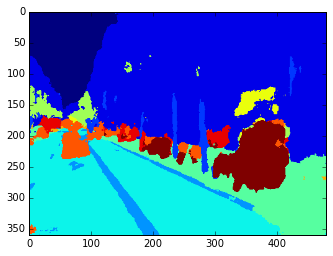

In [10]:
plt.imshow(ind)

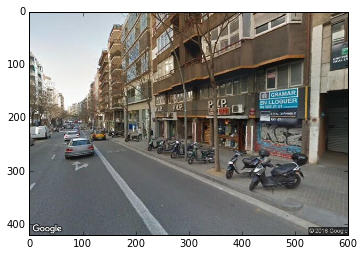

In [11]:
plt.imshow(img)

In [19]:
np.sum([(i==0) for i in np.nditer(ind)]) # number of pixels with the index of "0"

14048

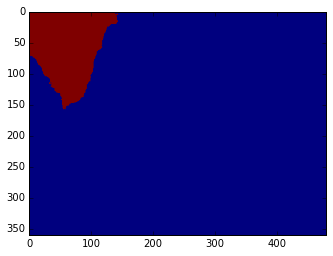

In [21]:
plt.imshow(np.array([(i==0) for i in np.nditer(ind)]).reshape((360,480)))

In [17]:
np.sum([1 for i in np.nditer(ind)]) # total number of pixels

172800